In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

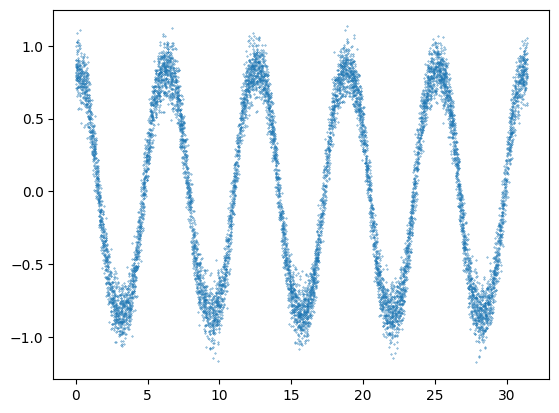

In [39]:
num_points = 10000
X = np.random.uniform(0, 10 * np.pi, num_points)
Y = np.sin(np.cos(X))

# add some noise to the data
Y += np.random.normal(0, 0.1, num_points)

plt.scatter(X, Y, s=0.1)
plt.show()

In [40]:
Y = np.array(Y)
X= np.array(X)


In [41]:
data = pd.DataFrame({'Y': Y, 'X': X, 'sinx': np.sin(X), 'cosx': np.cos(X), 'X^2': X**2, 'X^3': X**3})
data = np.array(data)

In [42]:
np.random.shuffle(data)

data

array([[ 5.97840222e-01,  1.36744017e+01,  8.94821431e-01,
         4.46424246e-01,  1.86989261e+02,  2.55696626e+03],
       [-1.01254714e-01,  7.88274293e+00,  9.99586423e-01,
        -2.87573264e-02,  6.21376360e+01,  4.89815011e+02],
       [-4.61413388e-01,  2.71578174e+01,  8.98577282e-01,
        -4.38815301e-01,  7.37547045e+02,  2.00301680e+04],
       ...,
       [ 6.41401942e-01,  6.96931870e+00,  6.33550324e-01,
         7.73701484e-01,  4.85714031e+01,  3.38509588e+02],
       [-8.80727594e-01,  9.89405844e+00, -4.52244669e-01,
        -8.91893917e-01,  9.78923925e+01,  9.68553052e+02],
       [ 5.09228989e-01,  2.44333304e+01, -6.43766975e-01,
         7.65221590e-01,  5.96987633e+02,  1.45863961e+04]])

In [43]:
X = data.T[1:6]
Y = data.T[0:1]

In [44]:
X_train = X.T[0:8000].T
Y_train = Y.T[0:8000].T

X_test = X.T[8000:].T
Y_test = Y.T[8000:].T

X_train.shape

(5, 8000)

In [45]:
def init_params():
    W1 = np.random.rand(32, 5) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(32, 32) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    W4 = np.random.rand(32, 32) - 0.5
    b4 = np.random.rand(32, 1) - 0.5
    W5 = np.random.rand(1, 32) - 0.5
    b5 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [46]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def tanh(Z):
    return np.tanh(Z)

def tanh_deriv(Z):
    return 1 - np.tanh(Z) ** 2

In [47]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = ReLU(Z4)
    Z5 = np.dot(W5, A4) + b5
    A5 = Z5
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5

In [48]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y):
    m = X.shape[1]
    dZ5 = A5 - Y
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * ReLU_deriv(Z4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * ReLU_deriv(Z3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5

In [49]:
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    W4 -= alpha * dW4
    b4 -= alpha * db4
    W5 -= alpha * dW5
    b5 -= alpha * db5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [50]:
def mse(A3, Y):
    m = Y.shape[1]
    return np.sum((A3 - Y) ** 2) / m

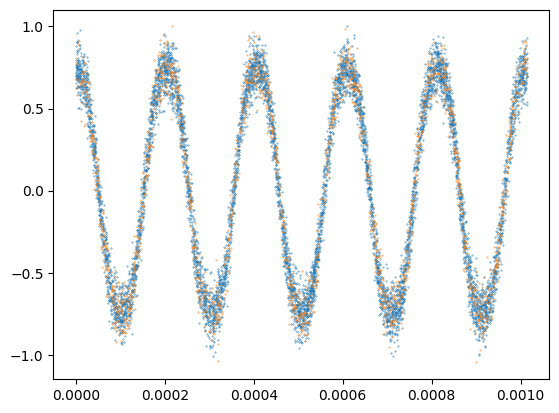

In [51]:
X_train = X_train / np.max(X_train)
Y_train = Y_train / np.max(Y_train)
X_test = X_test / np.max(X_test)
Y_test = Y_test / np.max(Y_test)

plt.scatter(X_train[0], Y_train[0], s=0.1)
plt.scatter(X_test[0], Y_test[0], s=0.1)

In [52]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        if i % 10 == 0:
            print("loss: ", mse(A3, Y), "iteration: ", i)
            if i % 50 == 0:
                plt.scatter(X[0], A5, s=0.1, label=f'{i}th iteration', c='r')
                plt.scatter(X[0], Y, c='b', s=0.1)
                plt.show()

        dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha)

    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5

loss:  17.270503016864836 iteration:  0


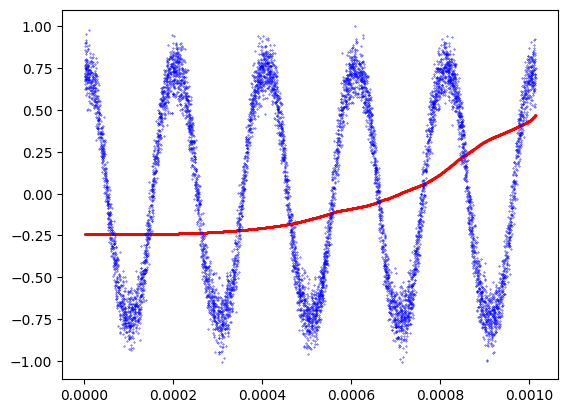

loss:  17.349186782365607 iteration:  10


In [53]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5 = gradient_descent(X_train, Y_train, 0.03, 1000)

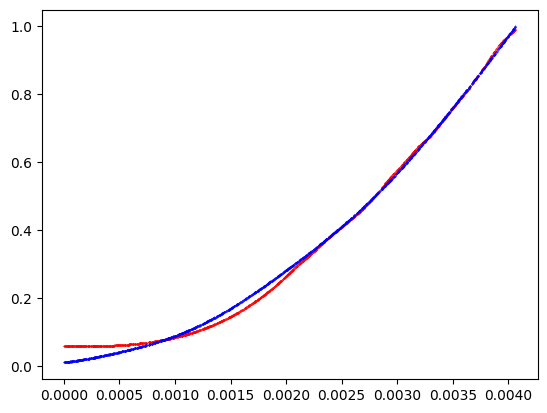

In [ ]:
Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, y_pred = forward_prop(X_test, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)

plt.scatter(X_test[0], y_pred, s=0.1, label='prediction', c='r')
plt.scatter(X_test[0], Y_test, s=0.1, label='actual', c='b')
